In [1]:
import pandas as pd
data = pd.read_csv('foreign_tourist.csv')

In [2]:
# Loại bỏ cột không cần thiết
data = data.drop(columns=['Unnamed: 8', 'Unnamed: 9'])

# Xử lý định dạng số
columns_to_convert = ['Ước tính mỗi tháng', 'Tổng lượt khách cả năm']
for col in columns_to_convert:
    data[col] = data[col].apply(lambda x: str(x).replace('.', '').replace(',', '.') if isinstance(x, str) else x).astype(float)
# Lọc bỏ dữ liệu liên quan đến đường hàng không, biển, bộ
filtered_data = data[~data['Chỉ tiêu'].str.contains('Đường', case=False)]

# Loại bỏ mục "Các thị trường khác"
filtered_data = filtered_data[~filtered_data['Chỉ tiêu'].str.contains('Các thị trường khác', case=False)]

In [3]:
# Tính tổng lượt khách theo tháng và năm
monthly_data_filtered = filtered_data.groupby(['Năm', 'Tháng', 'Chỉ tiêu'])['Ước tính mỗi tháng'].sum().reset_index()
yearly_country_data = monthly_data_filtered.groupby(['Năm', 'Chỉ tiêu'])['Ước tính mỗi tháng'].sum().reset_index()

In [4]:
# Lọc bỏ quốc gia không hợp lệ
valid_data = yearly_country_data[~yearly_country_data['Chỉ tiêu'].str.contains('Timeout|Không có dữ liệu', case=False)]

# Lấy top 5 và bottom 5 quốc gia theo năm
top_5_countries = valid_data.groupby('Năm').apply(lambda x: x.sort_values(by='Ước tính mỗi tháng', ascending=False).head(5)).reset_index(drop=True)
bottom_5_countries = valid_data.groupby('Năm').apply(lambda x: x.sort_values(by='Ước tính mỗi tháng').head(5)).reset_index(drop=True)
print(top_5_countries)
print(bottom_5_countries)

     Năm    Chỉ tiêu  Ước tính mỗi tháng
0   2019  Trung Quốc           5838461.0
1   2019    Hàn Quốc           4226370.0
2   2019    Nhật Bản            942692.0
3   2019    Đài Loan            927320.0
4   2019      Hoa Kỳ            720404.0
5   2020  Trung Quốc            785549.0
6   2020    Hàn Quốc            775402.0
7   2020         Nga            217615.0
8   2020    Đài Loan            196608.0
9   2020    Nhật Bản            191001.0
10  2022    Hàn Quốc            961802.0
11  2022      Hoa Kỳ            317288.0
12  2022    Thái Lan            201886.0
13  2022   Campuchia            200764.0
14  2022   Singapore            178745.0
15  2023    Hàn Quốc           3537605.0
16  2023  Trung Quốc           1744317.0
17  2023    Đài Loan            844844.0
18  2023      Hoa Kỳ            691260.0
19  2023    Nhật Bản            583470.0
20  2024    Hàn Quốc           4088508.0
21  2024  Trung Quốc           3342337.0
22  2024    Đài Loan           1186237.0
23  2024      Ho

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10824\554254979.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_countries = valid_data.groupby('Năm').apply(lambda x: x.sort_values(by='Ước tính mỗi tháng', ascending=False).head(5)).reset_index(drop=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10824\554254979.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bottom_5_countries = valid_data.groupb

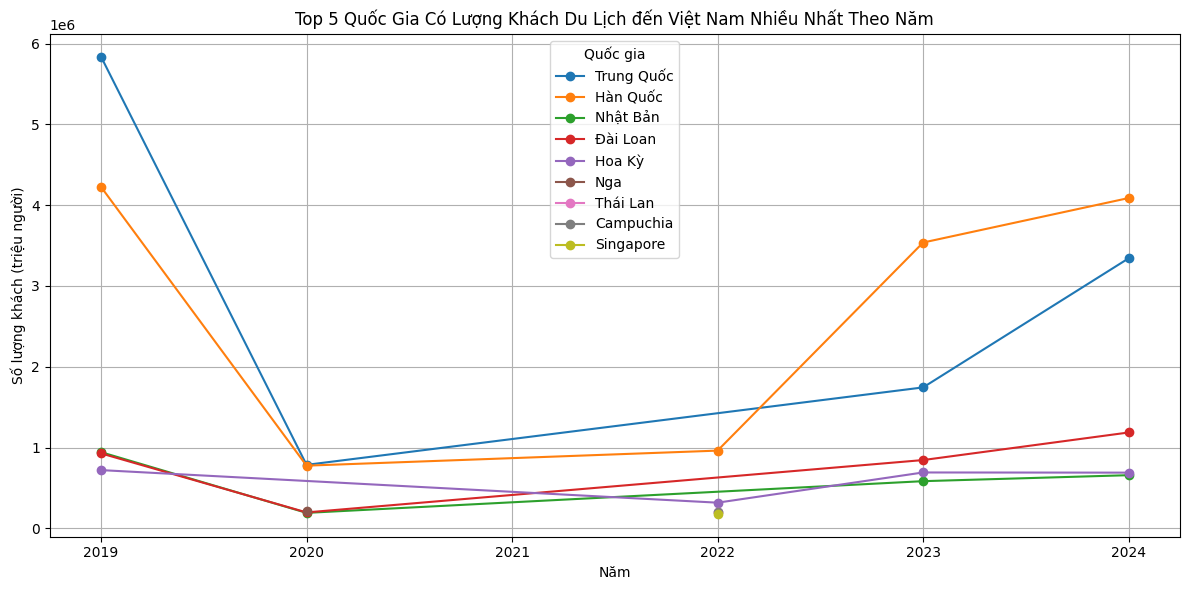

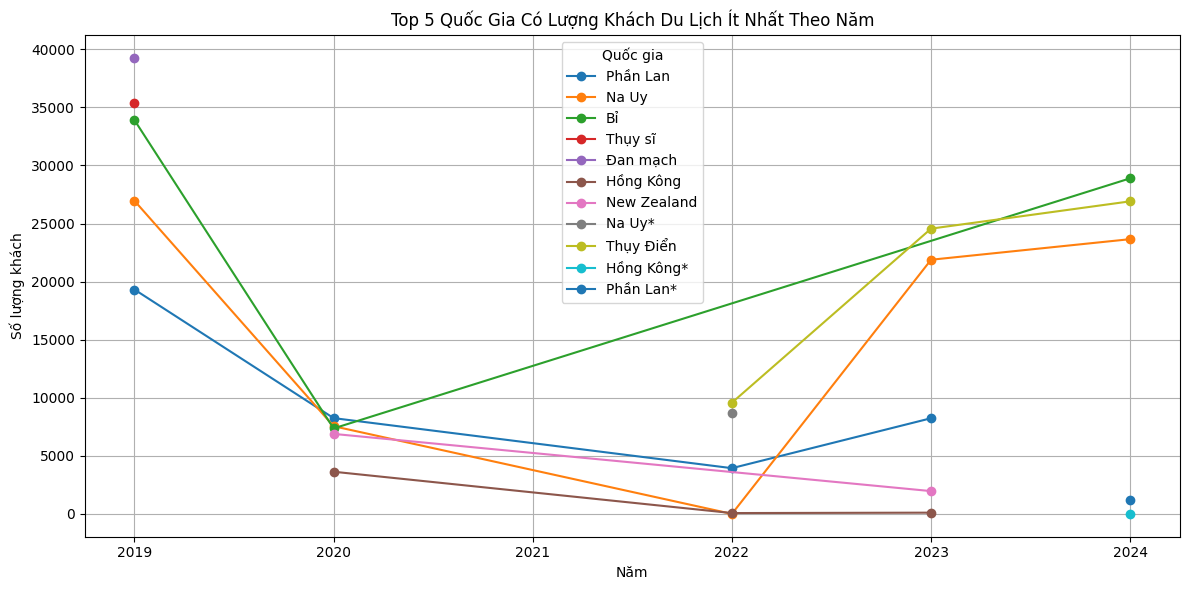

In [5]:
import matplotlib.pyplot as plt

#top 5 nhiều nhất
plt.figure(figsize=(12, 6))
for country in top_5_countries['Chỉ tiêu'].unique():
    subset = top_5_countries[top_5_countries['Chỉ tiêu'] == country]
    plt.plot(subset['Năm'], subset['Ước tính mỗi tháng'], marker='o', label=country)

plt.title('Top 5 Quốc Gia Có Lượng Khách Du Lịch đến Việt Nam Nhiều Nhất Theo Năm')
plt.xlabel('Năm')
plt.ylabel('Số lượng khách (triệu người)')
plt.legend(title='Quốc gia')
plt.grid(True)
plt.tight_layout()
plt.show()

#top 5 ít nhất
plt.figure(figsize=(12, 6))
for country in bottom_5_countries['Chỉ tiêu'].unique():
    subset = bottom_5_countries[bottom_5_countries['Chỉ tiêu'] == country]
    plt.plot(subset['Năm'], subset['Ước tính mỗi tháng'], marker='o', label=country)

plt.title('Top 5 Quốc Gia Có Lượng Khách Du Lịch Ít Nhất Theo Năm')
plt.xlabel('Năm')
plt.ylabel('Số lượng khách')
plt.legend(title='Quốc gia')
plt.grid(True)
plt.tight_layout()
plt.show()


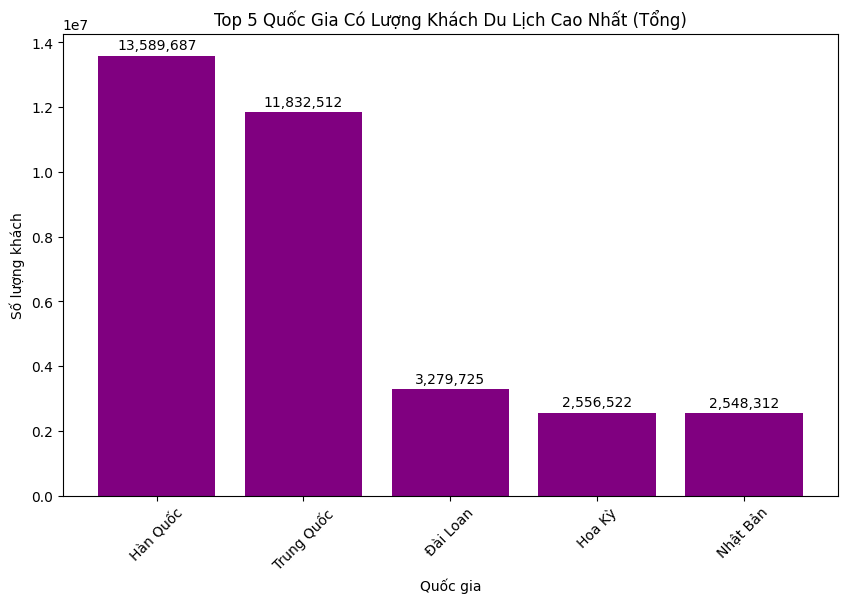

In [6]:
#Top 5 quốc gia có lượng khách cao nhất (toàn bộ dữ liệu)
top_5_overall = valid_data.groupby('Chỉ tiêu')['Ước tính mỗi tháng'].sum().nlargest(5).reset_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_overall['Chỉ tiêu'], top_5_overall['Ước tính mỗi tháng'], color='purple')
plt.title('Top 5 Quốc Gia Có Lượng Khách Du Lịch Cao Nhất (Tổng)')
plt.xlabel('Quốc gia')
plt.ylabel('Số lượng khách')
plt.xticks(rotation=45)
for bar in bars:
    value = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, value + 100000, f'{int(value):,}', ha='center', va='bottom')

### NÓI THÊM VÌ SAO CÁC NƯỚC NÀY DU LỊCH NHIỀU

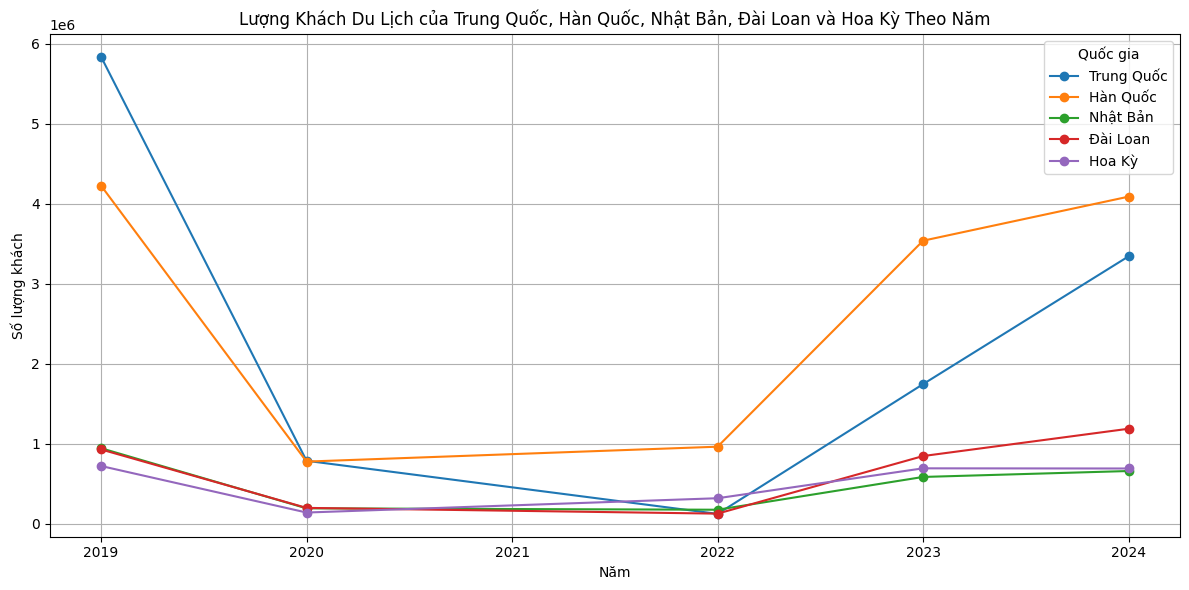

In [7]:
#3. Lượng khách của 5 quốc gia cụ thể (Trung Quốc, Hàn Quốc, Nhật Bản, Đài Loan, Hoa Kỳ)
selected_countries = ['Trung Quốc', 'Hàn Quốc', 'Nhật Bản', 'Đài Loan', 'Hoa Kỳ']
filtered_selected = valid_data[valid_data['Chỉ tiêu'].isin(selected_countries)]

plt.figure(figsize=(12, 6))
for country in selected_countries:
    subset = filtered_selected[filtered_selected['Chỉ tiêu'] == country]
    plt.plot(subset['Năm'], subset['Ước tính mỗi tháng'], marker='o', label=country)

plt.title('Lượng Khách Du Lịch của Trung Quốc, Hàn Quốc, Nhật Bản, Đài Loan và Hoa Kỳ Theo Năm')
plt.xlabel('Năm')
plt.ylabel('Số lượng khách')
plt.legend(title='Quốc gia')
plt.grid(True)
plt.tight_layout()

SHOW 2 BIỂU ĐỒ NÀY. pHÁT BIỂU DỰA THEO HƯỚNG. 
HÀN LÀ QUỐC GIA CÓ KHÍ HẬU KHÁ GIỐNG VIỆT NAM, CỘNG VỚI CHI PHÍ DU LỊCH KHÁ RẺ, NÊN NGƯỜI HÀN ĐẾN VIỆT NAM RẤT NHIỀU.
HÀN VỚI TRUNG CÓ LƯỢNG KHÁCH DU LỊCH CAO NHẤT. GIẢM BỞI 2020 VÀ 2021 COVID CẤM NHẬP CẢNH. NHƯNG SAU GIAI ĐOẠN NÀY, HAI NƯỚC NÀY CÓ XU HƯỚNG TĂNG TRƯỞNG RẤT TỐT. ĐẶC BIỆT LÀ TRUNG QUỐC, TỪ 2022-2024 TĂNG TRƯỞNG CỰC KỲ NHIỀU. 

<Figure size 1000x600 with 0 Axes>

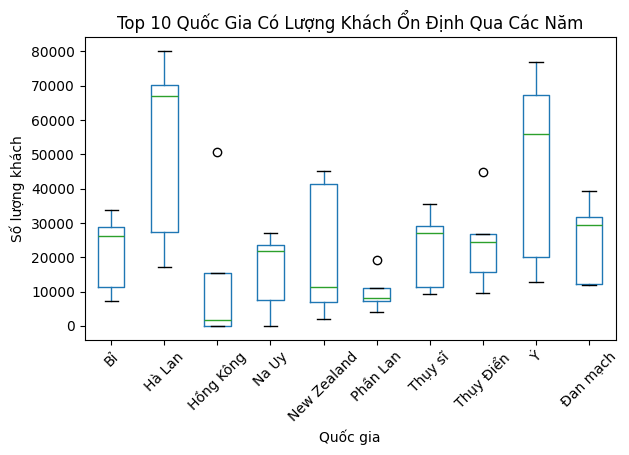

In [8]:
#Top 10 quốc gia có lượng khách ổn định qua các năm
country_stability = valid_data.groupby(['Chỉ tiêu', 'Năm'])['Ước tính mỗi tháng'].sum().reset_index()
top_10_stable = country_stability.groupby('Chỉ tiêu')['Ước tính mỗi tháng'].std().nsmallest(10).index
stable_data = country_stability[country_stability['Chỉ tiêu'].isin(top_10_stable)]

plt.figure(figsize=(10, 6))
stable_data.boxplot(by='Chỉ tiêu', column='Ước tính mỗi tháng', grid=False)
plt.title('Top 10 Quốc Gia Có Lượng Khách Ổn Định Qua Các Năm')
plt.suptitle('')
plt.xlabel('Quốc gia')
plt.ylabel('Số lượng khách')
plt.xticks(rotation=45)
plt.tight_layout()

Phân tích ổn định: Đoạn code tính toán độ lệch chuẩn (standard deviation - std) của lượng khách du lịch mỗi tháng theo từng quốc gia. Những quốc gia có độ lệch chuẩn thấp nhất được coi là ổn định nhất.

Biểu đồ hộp (Box plot):
Đường màu xanh lá cây bên trong hộp đại diện cho giá trị trung vị (median).

Phần hộp thể hiện khoảng giữa của 50% dữ liệu (IQR - Interquartile Range).

Hai râu của hộp đại diện cho dữ liệu nằm trong khoảng 1.5 lần IQR.

Các điểm tròn (outliers) bên ngoài râu thể hiện giá trị bất thường hoặc đột biến trong dữ liệu.


Hà Lan, Thụy Điển và Ý có hộp dài, cho thấy có sự dao động lớn trong lượng khách qua các năm, dù vậy độ lệch chuẩn vẫn nằm trong nhóm thấp nhất.
 ->Dù lượng khách có thể dao động theo năm nhưng độ lệch chuẩn tổng thể của họ vẫn thấp hơn so với các quốc gia khác.

In [9]:
stable_data

,Chỉ tiêu,Năm,Ước tính mỗi tháng
1,Bỉ,2019,33905.0
2,Bỉ,2020,7359.0
3,Bỉ,2022,11361.0
4,Bỉ,2023,26230.0
5,Bỉ,2024,28890.0
21,Hà Lan,2019,80085.0
22,Hà Lan,2020,17062.0
23,Hà Lan,2022,27385.0
24,Hà Lan,2023,67108.0
25,Hà Lan,2024,70320.0


In [10]:
#Top 3 quốc gia có lượng khách cao nhất mỗi năm
top_3_per_year = valid_data.groupby('Năm').apply(lambda x: x.nlargest(3, 'Ước tính mỗi tháng')).reset_index(drop=True)
print(f"Top 3 mỗi năm: {top_3_per_year}")

Top 3 mỗi năm:      Năm    Chỉ tiêu  Ước tính mỗi tháng
0   2019  Trung Quốc           5838461.0
1   2019    Hàn Quốc           4226370.0
2   2019    Nhật Bản            942692.0
3   2020  Trung Quốc            785549.0
4   2020    Hàn Quốc            775402.0
5   2020         Nga            217615.0
6   2022    Hàn Quốc            961802.0
7   2022      Hoa Kỳ            317288.0
8   2022    Thái Lan            201886.0
9   2023    Hàn Quốc           3537605.0
10  2023  Trung Quốc           1744317.0
11  2023    Đài Loan            844844.0
12  2024    Hàn Quốc           4088508.0
13  2024  Trung Quốc           3342337.0
14  2024    Đài Loan           1186237.0


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10824\2261338418.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_per_year = valid_data.groupby('Năm').apply(lambda x: x.nlargest(3, 'Ước tính mỗi tháng')).reset_index(drop=True)
